# Part1: KNN 基础

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# raw_data_X是特征
# raw_data_y是标签: 0为良性，1为恶性
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792784581, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [3]:
# 设置训练组
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

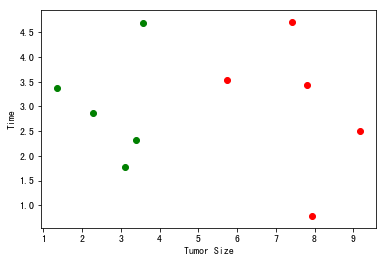

In [4]:
# 将数据可视化
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='g')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='r')
plt.xlabel('Tumor Size')
plt.ylabel('Time')
plt.show()

In [5]:
# 新加一个肿瘤患者的数据（样本点）x， 观察位置
x = np.array([8.093607318,3.365731514])

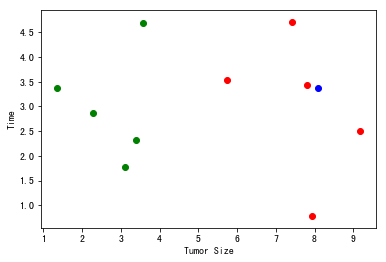

In [6]:
plt.scatter(X_train[y_train==0,0],X_train[y_train==0,1],color='g')
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1],color='r')
plt.scatter(x[0],x[1],color='b')
plt.xlabel('Tumor Size')
plt.ylabel('Time')
plt.show()

### KNN的过程

In [7]:
from math import sqrt
#新建一个列表，用来记录x到样本数据集中每个点的距离
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x) ** 2))
    distances.append(d)
#也可以用列表生成器，一行代码：distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]

In [8]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.30643091942921064,
 2.5786840957478887]

In [9]:
# 对数组进行排序，返回的是相应的排序后结果的索引
nearest = np.argsort(distances)

In [10]:
nearest
# 含义：距离最小的点在distances数组中的索引是8，第二小的点索引是7... 近到远是哪些点

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [11]:
k = 6
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

# 输出：[1, 1, 1, 1, 1, 0]

[1, 1, 1, 1, 1, 0]

In [12]:
from collections import Counter
votes = Counter(topK_y)  # 频次统计
votes

# 输出：一个字典，原数组中值为0的个数为1，值为1的个数有为5 Counter({0:1, 1:5})

Counter({1: 5, 0: 1})

In [13]:
# Counter.most_common(n) 找出票数最多的n个元素，返回的是一个列表，列表中的每个元素是一个元组，元组中第一个元素是对应的元素是谁，第二个元素是频次votes.most_common(1)

#输出：[(1,5)]

predict_y = votes.most_common(1)[0][0]
predict_y

#输出：1

1

# Part2: 用一个py函数封装上面写的代码

In [14]:
import numpy as np
from math import sqrt
from collections import Counter

def kNN_classify(k, X_train, y_train,x):
    
    assert 1 <= k <= X_train.shape[0], "k must be valid"
    assert X_train.shape[0] == y_train.shape[0],\
        "the size of X_train must equal to the size of y_train"
    assert X_train.shape[1] == x.shape[0],\
        "the feature number of x must be equal to X_train"
    
    distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in X_train]
    nearest = np.argsort(distances)
    
    topK_y = [y_train[i] for i in nearest[:k]]
    votes = Counter(topK_y)
    
    return votes.most_common(1)[0][0]

In [15]:
%run kNN_function/kNN.py

In [16]:
predict_y = kNN_classify(6,X_train,y_train,x)

In [17]:
predict_y

1

# Part3: 使用scikit-learn中的kNN

#### KNN算法是非常特殊的，可以被认为是没有模型的算法  
<img src='3.png' width=500 height=400>

####                                        可以认为训练数据集就是模型本身

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
# 面向对象进行包装，要创建一个kNN_classifier实例
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [22]:
# kNN_classifier做一遍fit（拟合）的过程，没有返回值，模型就存储在kNN_classifier实例中
kNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [25]:
X_predict = x.reshape(1,-1)
# kNN进行预测predict，需要传入一个矩阵，而不能是一个数组
# reshape()成一个二维数组，第一个参数是1表示只有一个数据，第二个参数-1，numpy自动决定第二维度有多少

In [28]:
y_predict = kNN_classifier.predict(X_predict)
# 也可以写成 y_predict = kNN_classifier.predict(x.reshape(1,-1))

In [30]:
y_predict[0]

1

## 重新整理我们自己的kNN函数

In [ ]:
class kNNClassifier(object):
    
    def __init__(self, k):
        """初始化kNN分类器"""
        assert k >= 1, "k must be valid"
        self.k = k
        self._X_train = None
        self._y_train = None
    def fit(self, X_train, y_train):
        """根据训练数据集X_train和y_train训练kNN分类器"""
        assert X_train.shape[0] == y_train.shape[0],\
            "the size of X_train must equal to the size of y_train"
        assert self.k <= X_train.shape[0],\
            "the size of X_train must be at least k"
        
        self._X_train = X_train
        self._y_train = y_train
        return self   #可以返回也可以不返回
    def predict(self, X_predict):
        """给定待预测数据集X_predict, 返回表示X_predict的结果向量"""
        assert self._X_train is not None and self._y_train is not None, \
            "must fit before predict!"
        assert X_predict.shape[1] == self._X_train.shape[1], \
            "the feature number of X_predict must be equal to X_train"
        
        y_predict = [self._predict(x) for x in X_predict]
        return np.array(y_predict)
    
    def _predict(self,x):
        """给定单个待预测数据x，返回x的预测结果值"""
        assert x.shape[0] == self._X_train.shape[1], \
            "the feature number of x must be equal to X_train"
        
        distances = [sqrt(np.sum((x_train - x) ** 2)) for x_train in self._X_train]
        nearest = np.argsort(distances)

        topK_y = [self._y_train[i] for i in nearest[:self.k]]
        votes = Counter(topK_y)

        return votes.most_common(1)[0][0]
    
    def __repr__(self):
        return "KNN(k=%d)" % self.k


In [44]:
%run kNN/kNN.py

In [45]:
knn_clf = kNNClassifier(k=6)

In [46]:
knn_clf.fit(X_train,y_train)

KNN(k=6)

In [47]:
y_predict = knn_clf.predict(X_predict)

In [48]:
y_predict[0]

1

# Part4 判断机器学习算法的性能

<img src='1.png' width=350 height=300>
<img src='2.png' width=350 height=300>


In [ ]:
# train test split
# 这样的算法其实也有问题，后面在阐述

### 测试我们的算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X.shape

(150, 4)

In [5]:
y.shape

(150,)

#### train_test_split

In [6]:
y
# y已经排好序了

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
shuffle_indexes = np.random.permutation(len(X))
#形成150个索引的随机排序

In [9]:
shuffle_indexes

array([ 67,  52,  12,  78, 143,  34,  71,  68, 130,  29, 145, 133,  79,
       149,   3,  56,  59,  73,  21,  83,   5,  58,  74,  45,  85, 117,
       104, 101,  70, 135,  39,  36, 108,  88, 115, 148,  76, 138,   0,
        54, 127,  41, 118, 107,  75,  89,  51,  90,  93,  77, 119,  40,
       122, 105,  82, 129,  91,  24,   7, 147, 144,  86,  46,   9,  87,
        26, 141,  25,  94, 125,  49,  81,  84, 139,  20,  22,  50,  57,
       100, 102,  60,  47,  19,  69,  53,  63,  11,  14, 112, 136, 142,
        27,   2, 109,  72, 126,  38, 131, 128,  96, 103, 116,  98,  66,
         1,  16,  13,  30,  35,  44,  32,  80,  64,   6,  92,  55, 146,
        33, 120,  23,  37, 111, 121, 114,  31, 110,  97, 140, 137, 132,
       123,  17, 106,   8,  48,  42,  10,  99,  62,  28, 124,  18,  65,
        61,  43,  95, 113,  15,   4, 134])

In [10]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)

In [11]:
test_size

30

In [13]:
test_indexes = shuffle_indexes[:test_size]
train_indexes =shuffle_indexes[test_size:]

In [14]:
X_train = X[train_indexes]
y_train = y[train_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

In [16]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [15]:
print(X_test.shape)
print(y_test.shape)

(30, 4)
(30,)


In [ ]:
import numpy as np
def train_test_split(X,y,test_ratio=0.2, seed=None):
    """将数据X和y按照test_ratio分割成X_train, X_test, y_train, y_test"""
    
    assert X.shape[0] == y.shape[0], \
        "the size of X must be equal to the size of y"
    assert 0.0 <= test_ratio <= 1.0, \
        "test_ratio must be valid"
    
    if seed:
        np.random.seed(seed)
    
    shuffle_indexes = np.random.permutation(len(X))
    
    test_size = int(len(X) * test_ratio)
    test_indexes = shuffle_indexes[:test_size]
    train_indexes =shuffle_indexes[test_size:]
    
    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]
    
    return X_train, X_test, y_train, y_test

#### 使用我们的算法

In [18]:
from playML.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [21]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [35]:
from playML.kNN import kNNClassifier

In [36]:
my_knn_clf = kNNClassifier(k=3)

In [37]:
my_knn_clf.fit(X_train,y_train)

KNN(k=3)

In [38]:
y_predict = my_knn_clf.predict(X_test)

In [39]:
y_predict

array([0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 1, 0, 0])

In [40]:
y_test

array([0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 0,
       2, 0, 0, 0, 2, 1, 0, 0])

In [41]:
sum(y_predict == y_test)

30

In [42]:
sum(y_predict == y_test) / len(y_test)

1.0

#### sklearn中的train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test)